<a href="https://colab.research.google.com/github/MaanasSM/Deep-Learning-Mini-Projects/blob/main/ResNET_lab5_12_2_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Normalize data to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0  # to convert colour image to black and white


In [ ]:
# Data Augmentation for improving generalization
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"   # nearest interpolation technique will be used
)
datagen.fit(x_train)


In [ ]:
# Build ResNet Model
def build_resnet_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(32, 32, 3)),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),

        layers.Dense(10, activation='softmax')  # Softmax Classifier
    ])
    return model


In [ ]:
# Hyperparameter tuning: Defining learning rate
initial_learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)


In [ ]:
# Compile model with Adam optimizer and categorical cross-entropy loss
model = build_resnet_model()
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


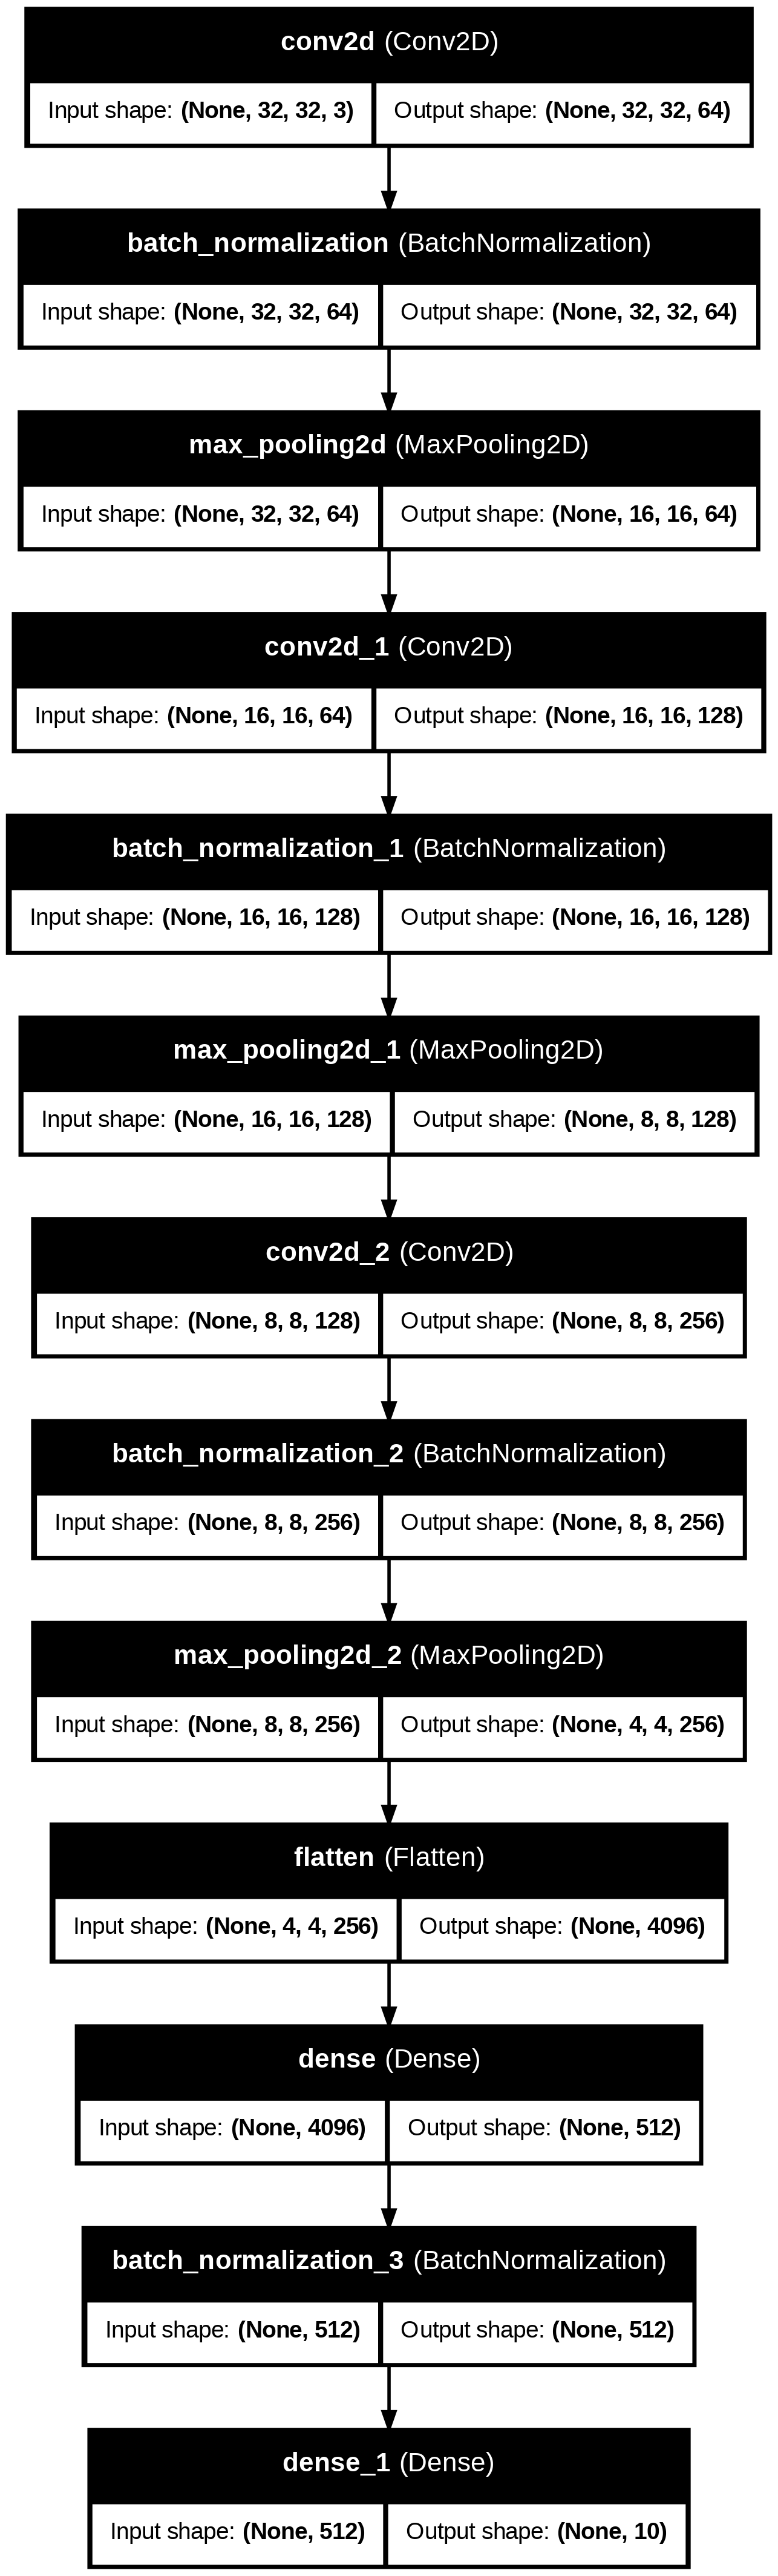

In [ ]:
# Visualising the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 23.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


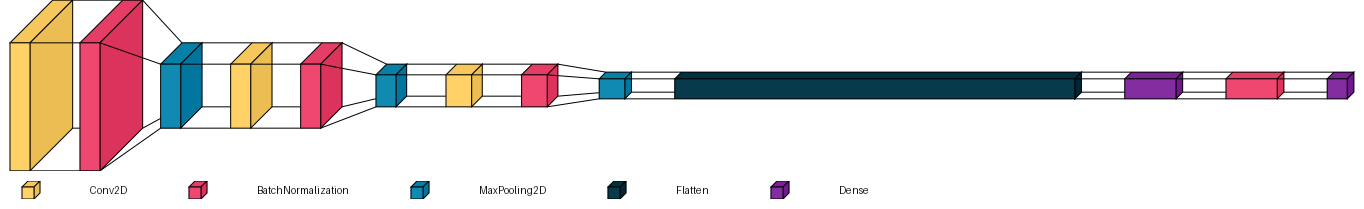

In [ ]:
# Visualising the model in layered format
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model,legend=True,spacing=50,background_fill = 'white')

In [ ]:
# Early stopping to avoid overfitting (monitor validation accuracy)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
# Training the model with Data Augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 46ms/step - accuracy: 0.4007 - loss: 1.7699 - val_accuracy: 0.5767 - val_loss: 1.1701
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.5590 - loss: 1.2311 - val_accuracy: 0.5889 - val_loss: 1.2097
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.6232 - loss: 1.0722 - val_accuracy: 0.6325 - val_loss: 1.0853
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6592 - loss: 0.9648 - val_accuracy: 0.6674 - val_loss: 0.9606
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6910 - loss: 0.8868 - val_accuracy: 0.6007 - val_loss: 1.3210
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7127 - loss: 0.8308 - val_accuracy: 0.7227 - val_loss: 0.8129
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7245 - loss: 0.7901 - val_accuracy: 0.6851 - val_loss: 0.9845
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7424 - loss: 0.7414 - 

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


In [ ]:
# Plotting training vs validation accuracy (Underfitting vs Overfitting)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Plotting training vs validation loss (Underfitting vs Overfitting)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
!pip install scikit-learn # for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for visualizing confusion matrix


# Step 8: Predictions and Confusion Matrix
# Get the predicted class labels
y_pred = model.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)


# Get the true class labels
y_true = tf.argmax(y_test, axis=1)


# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)


# Visualize confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
